In [1]:
# Here We'll test wrangle modules / explore modules / anything else needed

In [50]:
import wrangle
import model
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [3]:
pd.Timestamp.now()

Timestamp('2022-03-04 08:44:47.718107')

In [4]:
df = wrangle.acquire_emails()

In [5]:
pd.Timestamp.now()

Timestamp('2022-03-04 08:45:40.201941')

In [6]:
df.head()

,file,subject,sender,date,content
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!
3,allen-p/_sent_mail/1000.,,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.


In [7]:
df, time_series_df = wrangle.create_dataframes_wrangle()

polarity and subjectivity algo complete
added sub and pol to df


In [8]:
pd.Timestamp.now()

Timestamp('2022-03-04 09:25:32.295605')

In [9]:
df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,2001-05-14 23:39:00+00:00,Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,2001-05-04 20:51:00+00:00,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,2000-10-18 10:00:00+00:00,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,,phillip.allen@enron.com,2000-10-23 13:13:00+00:00,"Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,2000-08-31 12:07:00+00:00,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [10]:
time_series_df.head()

,intensity,polarity,subjectivity,year,month
date,,,,,
1999-01-04 10:21:00+00:00,0.2023,0.000000,0.000000,1999,1
1999-01-04 10:21:00+00:00,0.2023,0.000000,0.000000,1999,1
1999-01-04 12:11:00+00:00,0.3182,0.016667,0.266667,1999,1
1999-01-04 12:11:00+00:00,0.3182,0.016667,0.266667,1999,1
1999-01-05 06:36:00+00:00,0.9895,0.076871,0.329783,1999,1


In [11]:
# df.to_csv('01-clean_data.csv')

In [12]:
#time_series_df.to_csv('02-ts_data.csv')

In [13]:
# df = pd.read_csv('01-clean_data.csv')
# df.head()

In [14]:
# df = df.drop(columns = ['Unnamed: 0'])
# df.head()

In [15]:
df.date = pd.to_datetime(df.date, utc=True)
df.head(1)

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,2001-05-14 23:39:00+00:00,Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0,0.0,0.0,False,True


In [16]:
isPoi_df = df[df.is_poi == True]
isPoi_df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
1042,allen-p/all_documents/50.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True
1284,allen-p/deleted_items/149.,Check this out -,jeff.richter@enron.com,2001-10-23 14:44:39+00:00,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip which one should i do the 8x12 is hal...,phillip which one should i do the 8x12 is half...,phillip one 8x12 half price jeff original mess...,phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,True
1694,allen-p/discussion_threads/190.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True
2103,allen-p/notes_inbox/40.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True
8641,badeer-r/all_documents/101.,RE: Path 26 OTC increase -- IMPORTANT,tim.belden@enron.com,2000-08-20 21:12:00+00:00,check this out and let everyone know what's up...,check this out and let everyone know what's up...,check this out and let everyone know what ' s ...,check let everyone know ' forwarded tim belden...,check let everyone know ' forwarded tim belden...,0.9756,0.013605,0.358503,True,True


In [17]:
isPoi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579 entries, 1042 to 516364
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   file          5579 non-null   object             
 1   subject       5579 non-null   object             
 2   sender        5579 non-null   object             
 3   date          5579 non-null   datetime64[ns, UTC]
 4   content       5579 non-null   object             
 5   clean         5579 non-null   object             
 6   tokenize      5579 non-null   object             
 7   stop_words    5579 non-null   object             
 8   lemmatize     5579 non-null   object             
 9   intensity     5579 non-null   float64            
 10  polarity      5579 non-null   float64            
 11  subjectivity  5579 non-null   float64            
 12  is_poi        5579 non-null   bool               
 13  is_internal   5579 non-null   bool               
dtypes: 

In [18]:
df_2000, df_2001 = wrangle.create_topic_dataframes(df)

In [19]:
df_2000.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
1042,allen-p/all_documents/50.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True
1694,allen-p/discussion_threads/190.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True
2103,allen-p/notes_inbox/40.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True
8641,badeer-r/all_documents/101.,RE: Path 26 OTC increase -- IMPORTANT,tim.belden@enron.com,2000-08-20 21:12:00+00:00,check this out and let everyone know what's up...,check this out and let everyone know what's up...,check this out and let everyone know what ' s ...,check let everyone know ' forwarded tim belden...,check let everyone know ' forwarded tim belden...,0.9756,0.013605,0.358503,True,True
8671,badeer-r/all_documents/129.,PX Letter,tim.belden@enron.com,2000-08-15 06:23:00+00:00,"Please see the attached. Christian, could you...",please see the attached christian could you c...,please see the attached christian could you co...,please see attached christian could coordinate...,please see attached christian could coordinate...,0.5574,-0.083333,0.166667,True,True


In [20]:
df_2001.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
1284,allen-p/deleted_items/149.,Check this out -,jeff.richter@enron.com,2001-10-23 14:44:39+00:00,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip which one should i do the 8x12 is hal...,phillip which one should i do the 8x12 is half...,phillip one 8x12 half price jeff original mess...,phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,True
18020,baughman-d/all_documents/332.,"Duke Purchase for tomorrow, April 26th",john.forney@enron.com,2001-04-25 12:37:00+00:00,I have purchased from Duke 100 mw's at $51 ...,i have purchased from duke 100 mw's at 51 f...,i have purchased from duke 100 mw ' s at 51 fo...,purchased duke 100 mw ' 51 flow entergy see de...,purchased duke 100 mw ' 51 flow entergy see de...,0.5859,0.200000,0.796296,True,True
18869,baughman-d/discussion_threads/329.,"Duke Purchase for tomorrow, April 26th",john.forney@enron.com,2001-04-25 12:37:00+00:00,I have purchased from Duke 100 mw's at $51 ...,i have purchased from duke 100 mw's at 51 f...,i have purchased from duke 100 mw ' s at 51 fo...,purchased duke 100 mw ' 51 flow entergy see de...,purchased duke 100 mw ' 51 flow entergy see de...,0.5859,0.200000,0.796296,True,True
19062,baughman-d/enron_power/24_hour/12.,Associate/Analyst Program,kenneth.lay@enron.com,2001-08-23 18:24:25+00:00,\n\nTo:\tAssociate/Analyst Program Worldwide\...,to associateanalyst program worldwide ...,to associateanalyst program worldwide from ken...,associateanalyst program worldwide ken lay dep...,associateanalyst program worldwide ken lay dep...,0.9824,0.172063,0.480234,True,True
19817,baughman-d/power/24_hour/152.,"Duke Purchase for tomorrow, April 26th",john.forney@enron.com,2001-04-25 22:37:00+00:00,I have purchased from Duke 100 mw's at $51 ...,i have purchased from duke 100 mw's at 51 f...,i have purchased from duke 100 mw ' s at 51 fo...,purchased duke 100 mw ' 51 flow entergy see de...,purchased duke 100 mw ' 51 flow entergy see de...,0.5859,0.200000,0.796296,True,True


In [21]:
df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,,phillip.allen@enron.com,2001-05-14 23:39:00+00:00,Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,2001-05-04 20:51:00+00:00,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,2000-10-18 10:00:00+00:00,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,,phillip.allen@enron.com,2000-10-23 13:13:00+00:00,"Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,2000-08-31 12:07:00+00:00,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [22]:
# removed lemmatized from drop
def create_time_series_df_allyears(df):
    df = df.drop(columns = ['file', 'sender', 'subject', 'content', 'clean', 'tokenize', 'stop_words', 'lemmatize', 'is_internal', 'is_poi'])

    df.date = pd.to_datetime(df.date, utc=True)

    df = df.set_index('date').sort_index()

    df['year'] = df.index.year
    df['month'] = df.index.month
    
    return df

In [23]:
df = create_time_series_df_allyears(df)
df.head()

,intensity,polarity,subjectivity,year,month
date,,,,,
1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250,1980,1
1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000,1980,1
1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575,1980,1
1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333,1980,1
1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810,1980,1


In [24]:
df.index.year.value_counts()

2001    272964
2000    196100
2002     35974
1999     11144
1980       522
1997       437
1998       177
2004        70
2044         3
1986         2
2012         2
2020         2
2005         1
2007         1
2024         1
2043         1
Name: date, dtype: int64

In [25]:
#df.to_csv('03-ts_all_years_data.csv')

In [26]:
df.head(1)

,intensity,polarity,subjectivity,year,month
date,,,,,
1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.43125,1980,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517401 entries, 1980-01-01 00:00:00+00:00 to 2044-01-04 22:48:58+00:00
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   intensity     517401 non-null  float64
 1   polarity      517401 non-null  float64
 2   subjectivity  517401 non-null  float64
 3   year          517401 non-null  int64  
 4   month         517401 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 23.7 MB


In [28]:
#using train data
by_date = df.groupby(['date']).intensity.sum().reset_index()
by_date.head()

,date,intensity
0,1980-01-01 00:00:00+00:00,248.8645
1,1986-04-26 15:22:07+00:00,0.9628
2,1986-05-01 14:37:34+00:00,0.8617
3,1997-01-01 17:22:03+00:00,0.5267
4,1997-03-03 11:00:00+00:00,0.0000


In [29]:
coolguy = df.groupby(['date']).polarity.sum().reset_index()
doglover = df.groupby(['date']).subjectivity.sum().reset_index()

<AxesSubplot:xlabel='date'>

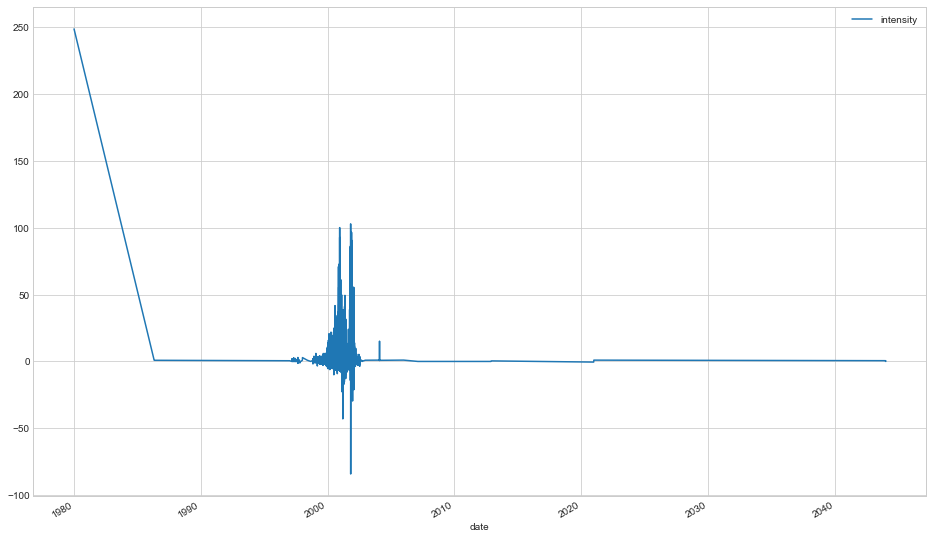

In [30]:
#using train data
#plt.figure(figsize=(16,10))
by_date.plot(x = 'date', y = 'intensity', figsize=(16,10))

<AxesSubplot:xlabel='date'>

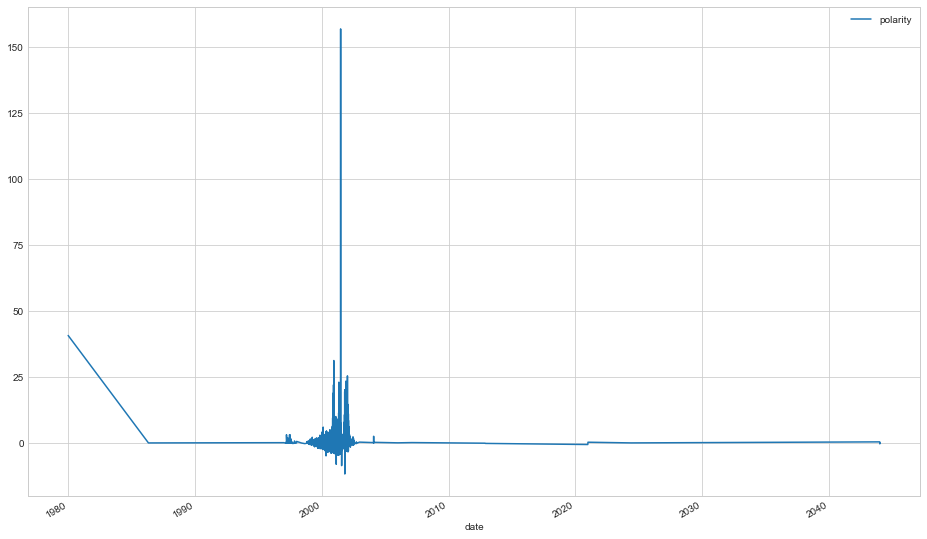

In [31]:
coolguy.plot(x = 'date', y = 'polarity', figsize=(16,10))

<AxesSubplot:xlabel='date'>

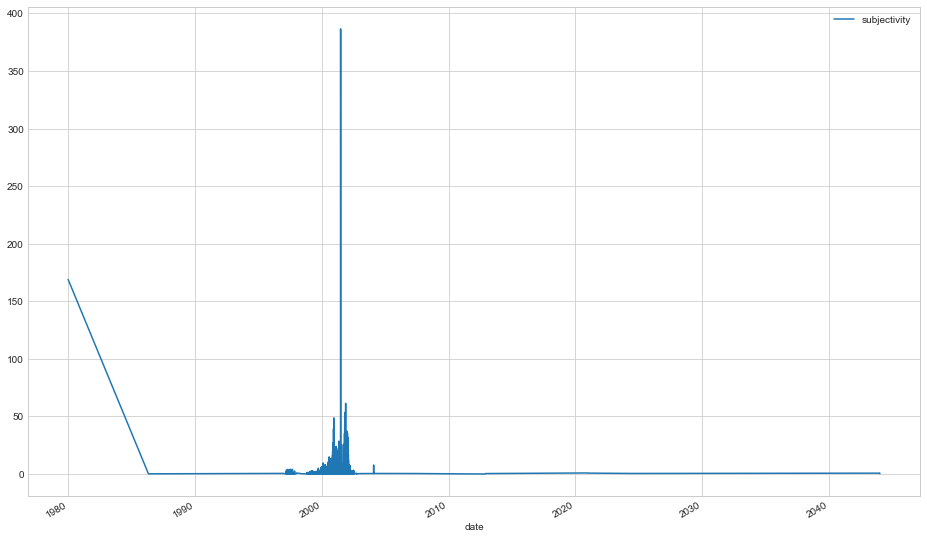

In [32]:
doglover.plot(x = 'date', y = 'subjectivity', figsize=(16,10))

# Topic Modeling

## BERTopic

In [3]:
# # saved df_2000 and df_2001
# df_2001.to_csv('df_2001.csv')
# df_2000.to_csv('df_2000.csv')

NameError: name 'df_2001' is not defined

## Read in dataframes for poi & 200/2001

In [22]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:35:45.891046')

In [23]:
df_2001 = pd.read_csv('df_2001.csv')
df_2000 = pd.read_csv('df_2000.csv')

In [24]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:35:46.217994')

In [25]:
df_2000.head(1)

,Unnamed: 0,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,1042,allen-p/all_documents/50.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0,-0.015152,0.393939,True,True


In [26]:
df_2001.head(1)

,Unnamed: 0,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,1284,allen-p/deleted_items/149.,Check this out -,jeff.richter@enron.com,2001-10-23 14:44:39+00:00,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip which one should i do the 8x12 is hal...,phillip which one should i do the 8x12 is half...,phillip one 8x12 half price jeff original mess...,phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,True


In [27]:
df_2000 = df_2000.drop(columns = ['Unnamed: 0'])
df_2000.date = pd.to_datetime(df_2000.date, utc=True)
df_2000 = df_2000.fillna('')
df_2000.head(1)

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/all_documents/50.,"New Generation, Nov 30th",tim.belden@enron.com,2000-12-05 06:42:00+00:00,---------------------- Forwarded by Tim Belden...,forwarded by tim beldenhouect on 12052000 054...,forwarded by tim beldenhouect on 12052000 0544...,forwarded tim beldenhouect 12052000 0544 krist...,forwarded tim beldenhouect 12052000 0544 krist...,0.0,-0.015152,0.393939,True,True


In [28]:
df_2001 = df_2001.drop(columns = ['Unnamed: 0'])
df_2001.date = pd.to_datetime(df_2001.date, utc=True)
df_2001 = df_2001[df_2001.date.dt.year == 2001]
df_2001 = df_2001.fillna('')
df_2001.head(1)

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/deleted_items/149.,Check this out -,jeff.richter@enron.com,2001-10-23 14:44:39+00:00,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip which one should i do the 8x12 is hal...,phillip which one should i do the 8x12 is half...,phillip one 8x12 half price jeff original mess...,phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,True


## Run create_topic_scores to get merged topics with sentiment scores

In [29]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:35:47.412428')

In [30]:
topics, probs, topic_model, topics_df, docs_df, topics_scores, emails_lemm = model.create_topic_scores(df=df_2000)
topics_scores.head(20)

polarity and subjectivity algo complete
added sub and pol to df


,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,59,0_ge_newalb_2001_reference,['rodney interesting title someone giving grie...,0.9947,-2.048319e-02,0.384769
1,1,53,1_mm_investment_fcel_portfolio,"[""jeff think take quick review existing pi por...",0.9761,3.541667e-02,0.442708
2,2,44,2_rick_md_vp_198mm,"['issue rick', 'news rick', 'rick look like nu...",0.4215,-4.000000e-01,0.600000
3,3,44,3_communicationsenron_communication_asia_massa...,['whalley significance death card tarot card k...,0.9851,-8.333333e-02,0.166667
4,4,43,4_darlene_holiday_jordan_christmas,"[""pls set forwarded david w delaineyhouect 091...",0.9954,1.402778e-01,0.469444
5,5,43,5_survey_pulse_employee_20,"[""brian great job would really like get done t...",0.9974,6.337479e-02,0.441407
6,6,42,6_adam_wind_deal_merrill,"[""keep pushing guy regard delainey forwarded d...",0.9983,1.178284e-01,0.432785
7,7,40,7_max_08212000_dick_vitro,"[""forwarded david w delaineyhouect 08252000 12...",0.2648,8.812500e-02,0.257500
8,8,40,8_reviewer_pep_httppepcorpenroncom_approval,['forwarded david w delaineyhouect 11132000 11...,0.9666,3.863636e-02,0.407955
9,9,36,9_version_section_jeannie_america,['forwarded christopher f calgerpdxect 1012200...,0.3182,3.469447e-18,0.237500


In [31]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:38:25.295787')

In [32]:
model.plot_distance_map(topic_model)

In [33]:
model.topic_tree(topic_model)

In [34]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:38:27.085587')

In [35]:
topic_model, topics_df, docs_df, topics_scores = model.create_topic_scores_reduced(emails_lemm, topics, topic_model, i=18)
topics_scores.head(20)

polarity and subjectivity algo complete
added sub and pol to df


,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,253,0_deal_ge_david_rodney,"['test3', 'test', 'test', ""mark response reque...",0.9999,0.091852,0.422592
1,1,147,1_dave_pm_kay_david,['believe handled appropriately however fyi re...,0.9998,0.142918,0.400268
2,2,139,2_rick_tx_great_let,"['fine need hard copy signature rick', 'look g...",0.9913,0.335417,0.499306
3,3,129,3_product_group_david_john,['dick right thing run timing issue future hes...,0.9994,0.084429,0.436249
4,4,128,4_guy_barge_delainey_regard,['forwarded rick buyhouect 11072000 0532 rick ...,0.9997,0.042180,0.392563
5,5,124,5_max_dick_mariner_project,"[""ken response note aware official dialogue mr...",0.9996,0.121699,0.481068
6,6,123,6_delainey_regard_fine_ok,"['yes', 'fine', 'ok', 'see attached', 'see att...",0.9451,0.323148,0.505556
7,7,120,7_iso_bid_ttc_jmf,"[""think everyone heard make even imperative co...",0.9967,0.083721,0.408011
8,8,110,8_reviewer_suggested_feedback_approval,['forwarded david w delaineyhouect 11132000 11...,0.9979,-0.041391,0.335009
9,9,104,9_ena_performance_david_john,"[""chris email ' pick name invited well regard ...",0.9998,0.098379,0.418931


In [36]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:38:30.214559')

In [37]:
model.plot_distance_map(topic_model)

In [38]:
model.topic_tree(topic_model)

In [39]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:38:31.773663')

In [40]:
topics, probs, topic_model, topics_df, docs_df, topics_scores, emails_lemm = model.create_topic_scores(df=df_2001)
topics_scores.head(20)

polarity and subjectivity algo complete
added sub and pol to df


,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,115,0_rick_original_message_sent,['like tx rick original message valdez veronic...,0.9313,0.099359,0.608974
1,1,83,1_meeting_jeff_know_rick,['greg nothing pressing wondering thing going ...,0.3400,0.061111,0.283333
2,2,57,2_communicationsenron_anne_ann_communication,['forwarded david w delaineyhouect 02022001 10...,0.9853,0.149306,0.421528
3,3,53,3_cdwr_ppa_priority_supplier,['purpose share discus script three applicatio...,0.9371,0.190625,0.537153
4,4,44,4_dinner_erica_murdock_message,"[""erica due fact jeff unable attend july 19 be...",0.9690,0.026010,0.274428
5,5,41,5_david_mark_steven_james,['fyi original message walker stacy behalf kim...,0.9914,0.057705,0.412489
6,6,35,6_chris_hill_black_louise,['everyone carla hoffman informed friday accep...,0.9970,0.312184,0.419781
7,7,35,7_board_director_october_lunch,"[""management committee invited join enron corp...",0.8519,0.122727,0.459091
8,8,33,8_thxs_delainey_regard_thsx,['ok call spare available needed regard delain...,0.2960,0.450000,0.450000
9,9,30,9_rick_news_discus_10am,"[""' meeting w bradford 11 discus want join u r...",0.6124,0.000000,0.000000


In [41]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:40:11.700272')

In [42]:
model.plot_distance_map(topic_model)

In [43]:
model.topic_tree(topic_model)

In [44]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:40:13.431194')

In [45]:
topic_model, topics_df, docs_df, topics_scores = model.create_topic_scores_reduced(emails_lemm, topics, topic_model, i=8)
topics_scores.head(20)

polarity and subjectivity algo complete
added sub and pol to df


,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,222,0_rick_buy_sent_2001,"['probably ok since got space network rick', '...",0.9993,0.146690,0.426310
1,1,157,1_meeting_rick_attend_get,['attend regular meeting aa rick causey discus...,0.9977,0.056629,0.314924
2,2,112,2_communication_communicationsenron_pm_david,"[""50000 prematch guess ultimate goal 100000 li...",0.9996,0.105521,0.391122
3,3,99,3_regard_delainey_thxs_thanks,['kyle sound like good deal look forward play ...,0.9937,0.355000,0.383889
4,4,62,4_canada_eastern_would_issue,['forwarded david w delaineyhouect 02152001 06...,0.9990,0.101465,0.393142
5,5,56,5_email_enron_board_kellyjohnsonenroncom,['please provide comment attached minute monda...,0.9360,0.105195,0.450649
6,6,53,6_cdwr_ppa_would_credit,['purpose share discus script three applicatio...,0.9371,0.190625,0.537153
7,7,45,7_rick_meeting_discus_make,['great want use upcoming credit conference th...,0.8689,0.478788,0.609848


In [46]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:40:15.045318')

In [47]:
model.plot_distance_map(topic_model)

In [48]:
model.topic_tree(topic_model)

In [49]:
pd.Timestamp.now()

Timestamp('2022-03-04 10:40:16.472873')